In [1]:
import pandas as pd

In [3]:
for i in range(55):
    if i==0:
        train = pd.read_pickle('../RIT_julio/SHAP/nuevo11/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('../RIT_julio/SHAP/nuevo11/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [4]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.500000,0.0,1.242375,2.156780,2.121928,0.50,0.547723,3.793043,0.004627,...,1.000000,4,2,5,0.700000,0.315587,0,0,0.500000,neutral
1,2,0.750000,0.0,1.364151,1.543752,0.721928,0.25,0.333333,3.899752,0.005008,...,1.500000,4,1,5,0.555556,0.315462,0,0,0.250000,contradiction
2,1,0.000000,0.0,1.354370,1.640224,1.370951,1.00,0.547723,3.895909,0.004943,...,0.918296,3,1,5,0.700000,0.335940,0,0,1.000000,entailment
3,-1,0.500000,0.5,0.000000,2.500000,0.000000,0.00,0.353553,0.000000,0.000000,...,1.584963,2,0,4,0.583333,0.000000,0,0,0.500000,neutral
4,2,1.000000,0.0,1.365683,1.405639,1.000000,0.00,0.353553,3.869048,0.004221,...,1.000000,2,1,4,0.583333,0.207519,0,0,0.000000,entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,2,1.000000,0.0,1.000007,1.356343,0.918296,0.00,0.000000,3.782035,0.005270,...,1.000000,6,3,4,0.297619,0.275025,0,0,0.000000,contradiction
9363,2,1.000000,0.0,1.000015,1.314536,1.143156,1.00,0.530330,3.811096,0.005172,...,0.918296,9,6,4,0.458333,0.161168,0,0,0.000000,neutral
9364,2,0.600000,0.0,1.290847,2.015061,1.384432,0.50,0.462910,3.624098,0.006082,...,1.521928,5,2,6,0.642857,0.424965,0,0,0.400000,neutral
9365,2,0.833333,0.0,1.400297,1.603158,0.650022,0.25,0.285714,3.759164,0.005035,...,0.650022,6,1,6,0.563492,0.312112,0,0,0.166667,contradiction


In [5]:
for i in range(55):
    if i==0:
        temp1 = pd.read_csv('../OPENAI/data/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv')
    else:
        try:
            temp = pd.read_csv('../OPENAI/data/SNLI/TRAIN10000/TRAIN_'+str(i+1)+'.csv')
            temp1=pd.concat([temp1,temp])
        except:
            print(i+1)

In [6]:
temp1

,Unnamed: 0,gold_label,sentence1,sentence2,SET
0,0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,TRAIN
1,1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",TRAIN
2,2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",TRAIN
3,3,neutral,Children smiling and waving at camera,They are smiling at their parents,TRAIN
4,4,entailment,Children smiling and waving at camera,There are children present,TRAIN
...,...,...,...,...,...
9362,549362,contradiction,Four dirty and barefooted children.,four kids won awards for 'cleanest feet',TRAIN
9363,549363,neutral,Four dirty and barefooted children.,"four homeless children had their shoes stolen,...",TRAIN
9364,549364,neutral,A man is surfing in a bodysuit in beautiful bl...,A man in a bodysuit is competing in a surfing ...,TRAIN
9365,549365,contradiction,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...,TRAIN


In [7]:
train=train.reset_index(drop=True)
temp1=temp1.reset_index(drop=True)

In [9]:
train["clases"]=temp1["gold_label"]
train["sentence_A"]=temp1["sentence1"]
train["sentence_B"]=temp1["sentence2"]

In [10]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [11]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,sentence_A,sentence_B
0,2,0.500000,0.0,1.242375,2.156780,0.034852,0.50,0.547723,0.458233,0.004627,...,0.500000,5,0.700000,0.315587,0,0,0.500000,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,2,0.750000,0.0,1.364151,1.543752,0.821824,0.25,0.333333,0.257524,0.005008,...,0.250000,5,0.555556,0.315462,0,0,0.250000,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."
2,1,0.000000,0.0,1.354370,1.640224,0.269273,1.00,0.547723,0.542400,0.004943,...,0.333333,5,0.700000,0.335940,0,0,1.000000,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
3,-1,0.500000,0.5,0.000000,2.500000,2.500000,0.00,0.353553,4.292915,0.000000,...,0.000000,4,0.583333,0.000000,0,0,0.500000,neutral,Children smiling and waving at camera,They are smiling at their parents
4,2,1.000000,0.0,1.365683,1.405639,0.405639,0.00,0.353553,0.455666,0.004221,...,0.500000,4,0.583333,0.207519,0,0,0.000000,entailment,Children smiling and waving at camera,There are children present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549362,2,1.000000,0.0,1.000007,1.356343,0.438047,0.00,0.000000,0.160490,0.005270,...,0.500000,4,0.297619,0.275025,0,0,0.000000,contradiction,Four dirty and barefooted children.,four kids won awards for 'cleanest feet'
549363,2,1.000000,0.0,1.000015,1.314536,0.171381,1.00,0.530330,0.296788,0.005172,...,0.666667,4,0.458333,0.161168,0,0,0.000000,neutral,Four dirty and barefooted children.,"four homeless children had their shoes stolen,..."
549364,2,0.600000,0.0,1.290847,2.015061,0.630630,0.50,0.462910,0.447004,0.006082,...,0.400000,6,0.642857,0.424965,0,0,0.400000,neutral,A man is surfing in a bodysuit in beautiful bl...,A man in a bodysuit is competing in a surfing ...
549365,2,0.833333,0.0,1.400297,1.603158,0.953135,0.25,0.285714,0.150272,0.005035,...,0.166667,6,0.563492,0.312112,0,0,0.166667,contradiction,A man is surfing in a bodysuit in beautiful bl...,A man in a business suit is heading to a board...


In [12]:
train=train[['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW','sumas','mutinf_t','max_info_t',
 'entail','list_comp','list_incomp','Jaro-Winkler_rit','negT','negH','overlap_ent','clases','sentence_A','sentence_B']]

In [13]:
train["clases"].unique()

array(['neutral', 'contradiction', 'entailment'], dtype=object)

In [14]:
entail_train=train[train["clases"]=="entailment"]
neutral_train=train[train["clases"]=="neutral"]
contradiction_train=train[train["clases"]=="contradiction"]
entail_train

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,sentence_A,sentence_B
2,1,0.000000,0.0,1.000000,0.547723,0.146683,4.438309,0.694298,0.666667,0,0,0.700000,0,0,1.000000,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
4,2,1.000000,0.0,0.000000,0.353553,0.104005,4.324714,0.533700,0.500000,0,0,0.583333,0,0,0.000000,entailment,Children smiling and waving at camera,There are children present
7,2,0.500000,0.0,0.333333,0.566947,0.059736,4.280203,0.583648,0.750000,1,0,0.595238,0,0,0.500000,entailment,A boy is jumping on skateboard in the middle o...,The boy does a skateboarding trick.
14,2,1.000000,0.0,0.333333,0.500000,0.071707,4.186577,0.498505,0.333333,0,0,0.666667,0,0,0.000000,entailment,Two blond women are hugging one another.,There are women showing affection.
17,2,0.500000,0.0,0.000000,0.408248,0.170110,4.248989,0.918905,0.500000,0,0,0.486111,0,0,0.500000,entailment,"A few people in a restaurant setting, one of t...",The diners are at a restaurant.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549354,1,0.000000,0.0,1.000000,0.534522,0.171845,4.756010,1.000000,1.000000,0,0,0.761905,0,0,1.000000,entailment,A group of four kids stand in front of a statu...,four kids standing
549355,1,0.000000,0.0,1.000000,0.707107,0.294418,4.737417,1.000000,1.000000,0,0,0.833333,0,0,1.000000,entailment,a kid doing tricks on a skateboard on a bridge,a kid is skateboarding
549359,1,0.000000,0.0,0.500000,0.534522,0.243264,4.676727,1.000000,1.000000,0,0,0.547619,0,0,1.000000,entailment,A dog with a blue collar plays ball outside.,a dog is outside
549361,2,0.666667,0.0,0.333333,0.750000,0.119840,4.335797,0.661994,0.600000,0,0,0.666667,0,0,0.333333,entailment,Four dirty and barefooted children.,four children have dirty feet.


In [15]:
entail_train.describe()

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent
count,183416.000000,183416.000000,183416.000000,183416.000000,183416.000000,183416.000000,1.834160e+05,183416.000000,183416.000000,183416.000000,183416.000000,183416.000000,183416.000000,183416.000000,183416.000000
mean,1.645058,0.398398,0.011502,0.528288,0.532313,0.171450,4.377359e+00,0.779018,0.867160,0.759819,0.010304,0.616056,0.002034,0.006602,0.599446
std,0.642473,0.316035,0.072547,0.333066,0.213533,0.084466,3.260788e-01,0.208100,0.205449,0.884079,0.102912,0.205653,0.045050,0.080987,0.316655
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.233296,7.238654e-13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.333333,0.384900,0.117425,4.198161e+00,0.636854,0.750000,0.000000,0.000000,0.496956,0.000000,0.000000,0.333333
50%,2.000000,0.333333,0.000000,0.500000,0.534522,0.169185,4.411007e+00,0.803650,1.000000,1.000000,0.000000,0.625000,0.000000,0.000000,0.666667
75%,2.000000,0.666667,0.000000,0.750000,0.680414,0.221685,4.660197e+00,1.000000,1.000000,1.000000,0.000000,0.761905,0.000000,0.000000,1.000000
max,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,4.903330e+00,1.000000,1.000000,10.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
def sample_std_mean(df_,n):
    columnas=['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW','sumas', 'mutinf_t', 'max_info_t',
              'entail', 'list_comp', 'list_incomp','Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent']
    new_sample=pd.DataFrame()
    i=0
    while i<n: 
        s=df_.sample(1)
        bandera=True
        for s_ in columnas:
            if((s[s_].values[0]<(df_.describe().at["mean",s_]-df_.describe().at["std",s_])) | (s[s_].values[0]>(df_.describe().at["mean",s_]+df_.describe().at["std",s_]))):
                bandera=False
                break
        if(bandera):
            new_sample=pd.concat([new_sample,s])
            i+=1
    return new_sample

In [17]:
entail_final=sample_std_mean(entail_train,50)
neutral_final=sample_std_mean(neutral_train,50)
contradiction_final=sample_std_mean(contradiction_train,50)

<Axes: >

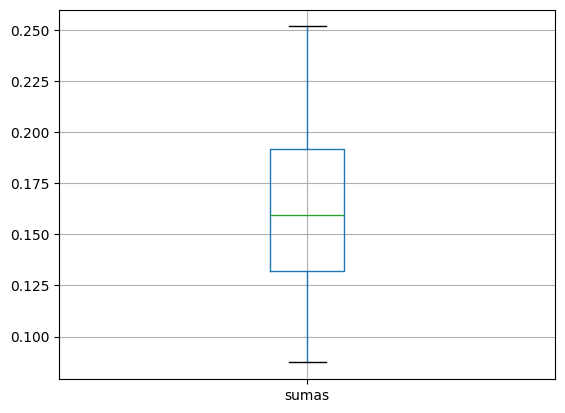

In [19]:
entail_final.boxplot(column=["sumas"])

In [18]:
entail_final.to_csv("predictions/fewshots/SNLI/entails.csv")
neutral_final.to_csv("predictions/fewshots/SNLI/neutrals.csv")
contradiction_final.to_csv("predictions/fewshots/SNLI/contradictions.csv")

In [16]:
entail_train.describe()

,relation,no_matcheadas,contradiction,jaccard,simBoW,sumas,mutinf_t,max_info_t,entail,list_comp,list_incomp,Jaro-Winkler_rit,negT,negH,overlap_ent
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1274.0,1274.000000,1274.000000
mean,1.462323,0.193015,0.006443,0.759106,0.770346,0.265583,4.522511,0.894239,0.944725,0.578493,0.015699,0.795037,0.0,0.003140,0.806174
std,0.620855,0.220742,0.046032,0.232554,0.217916,0.095337,0.219524,0.132623,0.127274,0.722574,0.130520,0.218851,0.0,0.055967,0.221566
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.062613,2.425534,0.268622,0.200000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.666667,0.666667,0.207370,4.415975,0.836853,1.000000,0.000000,0.000000,0.679067,0.0,0.000000,0.666667
50%,2.000000,0.166667,0.000000,0.750000,0.816497,0.259598,4.567568,0.932543,1.000000,0.000000,0.000000,0.875231,0.0,0.000000,0.833333
75%,2.000000,0.333333,0.000000,1.000000,0.953463,0.321637,4.694231,1.000000,1.000000,1.000000,0.000000,0.944444,0.0,0.000000,1.000000
max,2.000000,1.000000,0.666667,1.000000,1.000000,0.668438,4.820756,1.000000,1.000000,4.000000,2.000000,1.000000,0.0,1.000000,1.000000


# graficas

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF

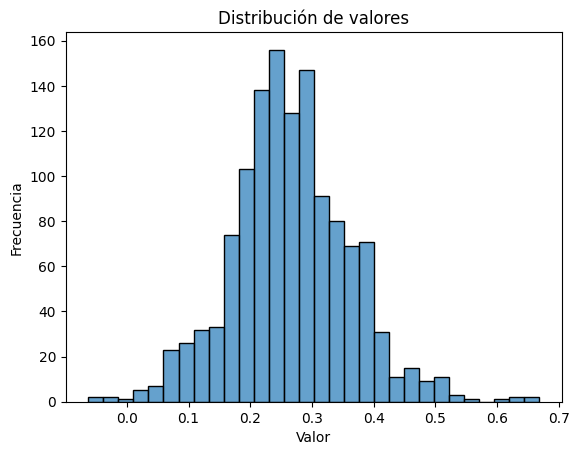

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Graficar la distribución de la columna 'values' utilizando un histograma con seaborn
sns.histplot(entail_train['sumas'],bins=30,  color="#3182bd")

# Agregar título y etiquetas
plt.title('Distribución de valores')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

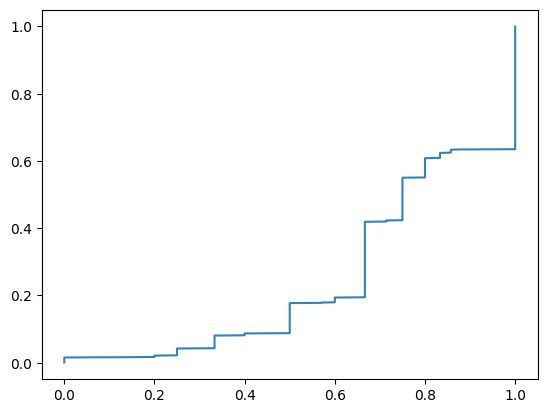

In [28]:
ecdf = ECDF(x=entail_train["jaccard"])
plt.plot(ecdf.x, ecdf.y, color="#3182bd")

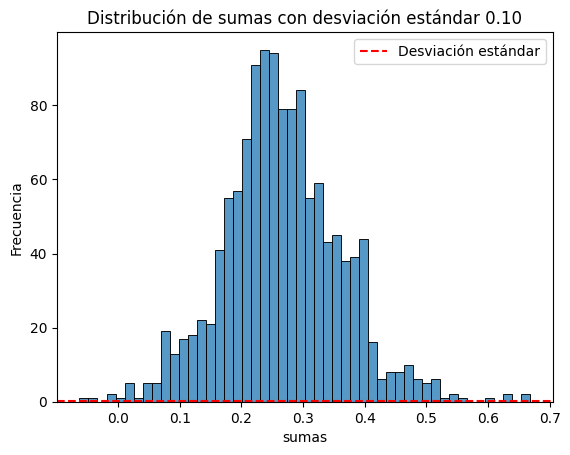

In [35]:
std_dev = entail_train["sumas"].std()
sns.histplot(entail_train["sumas"],  bins=50)
plt.axhline(y=std_dev, color='red', linestyle='--', label='Desviación estándar')
plt.title(f'Distribución de {"sumas"} con desviación estándar {std_dev:.2f}')
plt.xlabel("sumas")
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [36]:
print(std_dev)

0.09533693106481896
